## Creating a cluster and observing it

There are two ways of allocating computing resources in Dask. ```dask.distributed``` offers more control and can be run both on a local machine (laptop) or on a cluster, and we therefore focus on this.

The allocation and access to resources happens through two objects: a cluster and a client to access it.

## Cluster creation
First we create a cluster, here a local cluster on this machine, but it could also be a cluster e.g. on an HPC facility. We can specify many options here, in particular the number of workers (separate Python processes), the threads per worker etc.:

In [2]:
from dask.distributed import LocalCluster

In [3]:
cluster = LocalCluster(n_workers=1, threads_per_worker=1)

## Connecting to cluster via client
Now we can connect a client to our cluster to be able to acutally use it and submit computations. This is so to say our interface to the cluster:

In [4]:
from dask.distributed import Client

In [5]:
client = Client(cluster)

Here is our client:

In [6]:
client

Client Scheduler: tcp://127.0.0.1:64240 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 1 Memory: 17.18 GB


We see on the right a summary of the status of our cluster and on the left, two important addresses:

- The dashboard address (of the type http://127.0.0.1:8787/status) leads us to a dashboard where we can monitor the activity of the cluster. The Dask extension for Jupyterlab allows us to have acces to the monitoring dashborad directly within Jupyterlab. We can just choose the Dask icon on the left and use the Dashboard address to access all panels. **Note that when using a Jupyterhub you have to change the address to https://address-of-hub.ch/user/your-user-name/proxy/8787**
 
- The scheduler address allows us to create additional workers, e.g. directly in the terminal, by pointing them to the correct scheduler and typing:

    ```
    dask-worker "tcp://127.0.0.1:55323"
    ```

On top of many methods and attributes, the ```client``` also offers an interactive interface to the cluster:

In [7]:
client.cluster

Here we can interactively select the number of workers and say if we want it to be automatically adjusted.

## Using Dask extension

An alternative to create a cluster, is to use the Dask extension. If you click on "+NEW", a cluster is automatically created. To use it in your notebook simple click on the "<>" button which will add the client to your current notebook.

In [28]:
from IPython.display import HTML

HTML("""
<video width="800" controls>
  <source src="images/cluster_extension.mp4" type="video/mp4">
</video>
""")

## Example
We are going to see all these pieces in action now using a simple example handling numpy arrays.

In [8]:
from dask import delayed
import numpy as np

In [16]:
all_vals = []
for i in range(10):
    ar = delayed(np.random.randint)(1,100,(1000,1000,10))
    ar = delayed(np.log)(ar)#[::2,::2,0]
    mean_val = delayed(np.mean)(ar)
    all_vals.append(mean_val)
maxval = delayed(np.max)(all_vals)

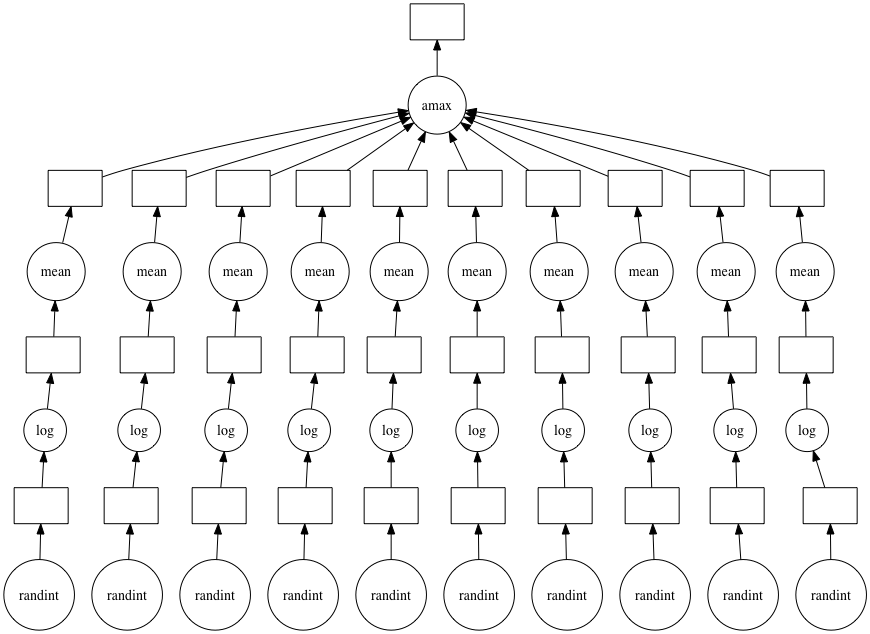

In [17]:
maxval.visualize()

In [11]:
maxval.compute()

3.6278351697511226

Now we do the same operation for a lot more iterations:

In [12]:
all_vals = []
for i in range(1000):
    ar = delayed(np.random.randint)(1,100,(1000,1000,10))
    ar = delayed(np.log)(ar)#[::2,::2,0]
    mean_val = delayed(np.mean)(ar)
    all_vals.append(mean_val)
maxval = delayed(np.max)(all_vals)

In [13]:
cluster

In [ ]:
maxval.compute()

Since this is very slow, we can now stop the operation, add a worker and restart.

Alternatively, as described above, to avoid stopping the calculation, we can dymamically assing new workers to the scheduler:

In [50]:
client

Client Scheduler: tcp://127.0.0.1:55323 Dashboard: http://127.0.0.1:55324/status,Cluster Workers: 4 Cores: 7 Memory: 68.72 GB


## Asynchronous calculation

We have just seen how to add new workers to a running computation. We had to do that through the command line, because the computation is blocking the execution of other tasks until completion. We can go around this by executing the tasks asynchronously using the ```client.compute()``` function instead of the regular ```compute()``` method. Asynchronous calculation is a complex topic about which you can learn more e.g. [here](https://distributed.dask.org/en/latest/manage-computation.html).

In [18]:
value = client.compute(maxval)

In [22]:
value.result()

3.6278351697511226

## Exercise

Open a new notebook and just try to create a cluster, a client, a dashboard, and run some code on it.